In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [6]:
!file data/*

data/34565-0001-Data.txt: ASCII text, with very long lines
data/co2_mm_mlo.txt:      ASCII text
data/test.fwf:            ASCII text


In [17]:
!wc data/34565-0001-Data.txt

  229211 22695570 280095842 data/34565-0001-Data.txt


In [19]:
!head -n 1 data/34565-0001-Data.txt

     1 2251082    .9426354082   3 4 1 2201141 2 865 105 1102005 1 2 1 2.00-7.00-7.0000-7.0000-7.00001255 105 1142032 4 1 1 2.50 5.00 5.0100-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.0000  -7  -7  -7  -7-7-7-7-7.00-7.00-7.0000-7.0000-7.000

In [48]:
colspecs = [(1,7), (15,30), (34,36), (36, 38), (38, 40), (1214, 1215)]

varNames = ["id", "wt", "age", "sex", "race", "type"]

dawn = pd.read_fwf('data/34565-0001-Data.txt', colspecs=colspecs, header=None, index_col=0,
                   names = varNames)

In [49]:
dawn.tail()

,wt,age,sex,race,type
id,,,,,
29207,4.203385,1,2,12,NaN
292081,4.215246,9,2,12,NaN
29209,4.139613,8,2-,82,NaN
29210,1.601442,1,2,22,NaN
29211,5.261895,0,2,22,NaN


In [51]:
colspecs = [(0,6), (14,29), (33,35), (35, 37), (37, 39), (1213, 1214)]

varNames = ["id", "wt", "age", "sex", "race","type"]

dawn = pd.read_fwf('data/34565-0001-Data.txt', colspecs=colspecs, header=None, index_col=0,
                   names = varNames)

In [52]:
dawn.tail()

,wt,age,sex,race,type
id,,,,,
229207,4.203385,11,2,1,4
229208,4.215246,9,2,1,8
229209,4.139613,8,2,-8,4
229210,1.601442,1,2,2,4
229211,5.261895,10,2,2,4


In [44]:
dawn.groupby(['age']).count()

,wt,sex,race,type
age,,,,
-8,68,68,68,68
1,8744,8744,8744,8744
2,2102,2102,2102,2102
3,11933,11933,11933,11933
4,17025,17025,17025,17025
5,18268,18268,18268,18268
6,22037,22037,22037,22037
7,19950,19950,19950,19950
8,36918,36918,36918,36918


In [43]:
dawn.groupby(['type']).count()

,wt,age,sex,race
type,,,,
1,9033,9033,9033,9033
2,14841,14841,14841,14841
3,7421,7421,7421,7421
4,88096,88096,88096,88096
5,18146,18146,18146,18146
6,793,793,793,793
7,3253,3253,3253,3253
8,87628,87628,87628,87628


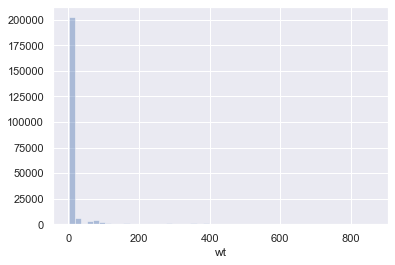

In [75]:
ax = sns.distplot(dawn.wt, kde=False, rug=False)

ax.figure.savefig("wtHist.png")

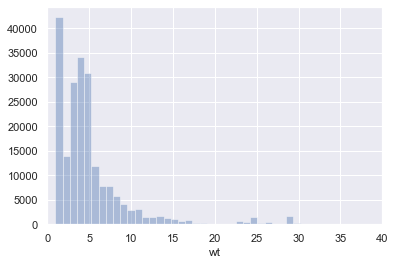

In [74]:
ax = sns.distplot(dawn.wt, bins = 1000, kde=False, rug=False)
plt.xlim(0, 40)
#ax.figure.savefig("wtHist1000.png")